# Homework 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from func import Func

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()

---
## Exercise 8.8


<img src="figures/homework-08/exercise-8.8.png" width="600" />


In [2]:
def create_ex88():
    x1, x2 = sy.symbols('x1, x2')
    f = 3*(x1**2  + x2**2)  +   4*x1*x2  + 5*x1  + 6*x2 + 7
    return Func(f, (x1, x2))
ex88 = create_ex88()
ex88

⎡    2                        2           ⎤
⎣3⋅x₁  + 4⋅x₁⋅x₂ + 5⋅x₁ + 3⋅x₂  + 6⋅x₂ + 7⎦

First, we need to rewrite the function $f$ as the following quadratic form:
$$
f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^T \mathbf{Q} \mathbf{x} - \mathbf{b}^T \mathbf{x}
$$

In [3]:
Q, b = ex88.as_quadratic_form_for_gradient_descent()
Q, b

Ignoring constant term: 1


⎛⎡6  4⎤  ⎡-5⎤⎞
⎜⎢    ⎥, ⎢  ⎥⎟
⎝⎣4  6⎦  ⎣-6⎦⎠

Let us ensure that the return $\mathbf{Q}$ and $\mathbf{b}$ are correct:

In [4]:
x1,x2 = sy.symbols('x1, x2')
x = sy.Matrix([[x1],
               [x2]])
sy.simplify(1/2 * x.T * Q * x - b.T * x)

⎡      2                              2         ⎤
⎣3.0⋅x₁  + 4.0⋅x₁⋅x₂ + 5.0⋅x₁ + 3.0⋅x₂  + 6.0⋅x₂⎦

The only difference with this result and the original function $f$ is the constant term. 

In [5]:
ex88

⎡    2                        2           ⎤
⎣3⋅x₁  + 4⋅x₁⋅x₂ + 5⋅x₁ + 3⋅x₂  + 6⋅x₂ + 7⎦

Next, we find the characteristic polynomial of $\mathbf{Q}$ which is given by $\det(\lambda I - Q)$:

In [6]:
lamda = sy.symbols('lambda')
char_poly = sy.det(lamda * sy.eye(2) - Q)
char_poly

Solving the characteristic polynomial, we get:

In [7]:
sy.nonlinsolve([char_poly], lamda)

From this, we know that $\lambda = 2$ and $\lambda = 10$. This means that eigenvalues of $\mathbf{Q}$ are $2$ and $10$. 

We can use SymPy to find the characteristic polynomial and eigenvalues directly:

In [8]:
Q.charpoly()

In [9]:
Q.eigenvals()

*Side Note: The result is interpreted as follows; the matrix $\mathbf{Q}$ has the eigenvalues 2 and 10 and that the eigenvalues 2 and 10 have algebraic multiplicity 1. Algebraic multiplicity is the number of times that an eigenvalue appears in the characteristic polynomial of a matrix. This is important because there are cases where the same eigenvalue appears multiple tiles in the characteristic polynomial of a matrix.*

In [10]:
sy.Matrix([[5, 0],
           [0, 5]]).eigenvals()

To find the range of values for $\alpha$, we use the Theorem 8.3:


<img src="figures/lecture-08/theorem-8.3.png" width="600" />


Since $\lambda_{max}(\mathbf{Q}) = 10$, the largest range of values of $\alpha$ for which the algorithm is globally convergent is $0 < \alpha < 2/10$

---
## Exercise 8.16


<img src="figures/homework-08/exercise-8.16.png" width="600" />


---
<img src="figures/homework-08/exercise-8.16-a.png" width="600" />


We know that $\lVert \mathbf{x} \rVert^2 = \mathbf{x}^T \mathbf{x}$ where $\mathbf{x} \in \mathbb{R}^n$ because by definition  $\lVert \mathbf{x} \rVert = \sqrt{\mathbf{x}^T \mathbf{x}}$, we have:

\begin{align}
\lVert \mathbf{Ax-b} \rVert^2 
&= (\mathbf{Ax} - \mathbf{b})^T(\mathbf{Ax} - \mathbf{b}) \\
&= (\mathbf{Ax})^T (\mathbf{Ax}) - (\mathbf{Ax})^T \mathbf{b} - \mathbf{b}^T(\mathbf{Ax})  + \mathbf{b}^T \mathbf{b} \\
&= \mathbf{x}^T \mathbf{A}^T (\mathbf{Ax}) - 2 (\mathbf{Ax})^T \mathbf{b}  + \mathbf{b}^T \mathbf{b} \\
&= \mathbf{x}^T (\mathbf{A}^T \mathbf{A})\mathbf{x} - 2 \mathbf{b}^T(\mathbf{Ax})  + \mathbf{b}^T \mathbf{b}
\end{align}

The gradient of the function is:
\begin{align}
f'(\mathbf{x}) = 2 (\mathbf{A}^T \mathbf{A})\mathbf{x} - 2 \mathbf{b}^T \mathbf{A}
\end{align}

The Hessian of the function is:
\begin{align}
f''(\mathbf{x}) = 2 (\mathbf{A}^T \mathbf{A})
\end{align}

Notice that $\mathbf{Q} = 2(\mathbf{A}^T \mathbf{A})$. Why? Consider the quadratic function of the form:

$$
g(\mathbf{x}) = \frac{1}{2} \mathbf{x}^T \mathbf{Q} \mathbf{x} - \mathbf{b}^T \mathbf{x}
$$


If wanted to extract $\mathbf{Q}$ out of this expression, we find the Hessian. First, let us compute the gradient of $g$:
$$
g(\mathbf{x}) = \mathbf{Q} \mathbf{x} - \mathbf{b}
$$

The Hessian of $g$ is:
$$
g(\mathbf{x}) = \mathbf{Q}
$$

Therefore, whenever we need to find the $\mathbf{Q}$ for a quadratic function, we simply compute the Hessian and the result is an expression of $\mathbf{Q}$.

---
Let us verify our result using SymPy:

In [11]:
m, n = sy.symbols('m, n')
A = sy.MatrixSymbol('A', m, n)
b = sy.MatrixSymbol('b', m, 1)
x = sy.MatrixSymbol('x', n, 1)

# Turn it into a Matrix
f = sy.Matrix([ (A*x - b).T * (A*x-b) ])
f

⎡⎛  T    T  T⎞           ⎤
⎣⎝-b  + x ⋅A ⎠⋅(-b + A⋅x)⎦

In [12]:
# Find the gradient of the function
gradient = f.jacobian([x])
gradient

⎡   T           ⎤
⎣2⋅A ⋅(-b + A⋅x)⎦

In [13]:
# Find the Hessian of the function
hessian = gradient.jacobian([x])
hessian

⎡   T  ⎤
⎣2⋅A ⋅A⎦

---
<img src="figures/homework-08/exercise-8.16-b.png" width="600" />


In general, the fixed-step-size algorithm is given by:


<img src="figures/lecture-08/fixed-step-size-gradient-algorithm.png" width="600" />


where $\mathbf{g}^{(k)}$ is gradient of the function i.e., $\nabla f(\mathbf{x}^{(k)})$

The fixed-step-size gradient algorithm for the optimisation problem is therefore:
$$
\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} - \alpha (  2 (\mathbf{A}^T \mathbf{A})\mathbf{x} - 2 \mathbf{b}^T \mathbf{A}  )
$$

---
<img src="figures/homework-08/exercise-8.16-c.png" width="600" />


To solve this exercise, we need to compute the eigenvalues of $\mathbf{Q}$ and find the largest one. Now, the question is how to find $\mathbf{Q}$ given $\mathbf{A}$. Consider the quadratic function of the form:

$$
g(\mathbf{x}) = \frac{1}{2} \mathbf{x}^T \mathbf{Q} \mathbf{x} - \mathbf{b}^T \mathbf{x}
$$

If wanted to extract $\mathbf{Q}$ out of this expression, we find the Hessian. First, let us compute the gradient of $g$:
$$
g(\mathbf{x}) = \mathbf{Q} \mathbf{x} - \mathbf{b}
$$

The Hessian of $g$ is:
$$
g(\mathbf{x}) = \mathbf{Q}
$$

Therefore, whenever we need to find the $\mathbf{Q}$ for a quadratic function, we simply compute the Hessian and the result is an expression of $\mathbf{Q}$.

From exercise a) we know that Hessian and therefore $\mathbf{Q} = 2(\mathbf{A}^T \mathbf{A})$.

In [14]:
A = sy.Matrix([[1, 0],
               [0, 2]])
Q = 2* (A.T * A)

To determine the largest range of values of $\alpha$ for which the fixed-step-size algorithm is globally convergent, we use Theorem 8.3:


<img src="figures/lecture-08/theorem-8.3.png" width="600" />


We compute the eigenvalues of $\mathbf{Q}$:

In [15]:
Q.eigenvals()

Thus, $0 < \alpha < \frac{2}{8}$ or  $0 < \alpha < \frac{1}{4}$

---
## Exercise 8.21


<img src="figures/homework-08/exercise-8.21.png" width="600" />


---
<img src="figures/homework-08/exercise-8.21-a.png" width="600" />


In [16]:
def create_ex821():
    x1, x2 = sy.symbols('x1, x2')
    f = 1 + 2*x1 + 3*(x1**2 + x2**2) + 4*x1*x2
    return Func(f, (x1, x2))
ex821 = create_ex821()
ex821

⎡    2                        2    ⎤
⎣3⋅x₁  + 4⋅x₁⋅x₂ + 2⋅x₁ + 3⋅x₂  + 1⎦

First, we need to rewrite the function $f$ as the following quadratic form:
$$
f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^T \mathbf{Q} \mathbf{x} - \mathbf{b}^T \mathbf{x}
$$

In [17]:
Q, b = ex821.as_quadratic_form_for_gradient_descent()
(Q, b)

Ignoring constant term: 1


⎛⎡6  4⎤  ⎡-2⎤⎞
⎜⎢    ⎥, ⎢  ⎥⎟
⎝⎣4  6⎦  ⎣0 ⎦⎠

Verify that $\mathbf{Q}$ is correct:

In [18]:
sy.expand(Func.create_quadratic(Q/2, b))

⎡    2                        2⎤
⎣3⋅x₁  + 4⋅x₁⋅x₂ - 2⋅x₁ + 3⋅x₂ ⎦

Looks fine. Next, we determine the largest range of values of $\alpha$ for which the fixed-step-size algorithm is globally convergent. For this, we use Theorem 8.3:


<img src="figures/lecture-08/theorem-8.3.png" width="600" />


We compute the eigenvalues of $\mathbf{Q}$:

In [19]:
Q.eigenvals()

The upper range is $2/10 = 1/5$

In [20]:
ex821.find_step_size_range(Q)

---
<img src="figures/homework-08/exercise-8.21-b.png" width="600" />


In [21]:
def create_ex821b():
    Q = [[3, 3],
         [1, 3]]
    b = [16, 23]
    return Func.create_quadratic(Q, b)
ex821b = create_ex821b()
ex821b

[x₁⋅(3⋅x₁ + x₂) + 16⋅x₁ + x₂⋅(3⋅x₁ + 3⋅x₂) + 23⋅x₂]

First, we need to rewrite the function $f$ as the following quadratic form:
$$
f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^T \mathbf{Q} \mathbf{x} - \mathbf{b}^T \mathbf{x}
$$

In [22]:
Q, b = ex821b.as_quadratic_form_for_gradient_descent()
(Q, b)

⎛⎡6  4⎤  ⎡-16⎤⎞
⎜⎢    ⎥, ⎢   ⎥⎟
⎝⎣4  6⎦  ⎣-23⎦⎠

Let us check that $\mathbf{Q}$ is correct.

In [23]:
sy.expand(ex821b._f[0])

In [24]:
sy.expand(Func.create_quadratic(Q/2, b))

⎡    2                         2        ⎤
⎣3⋅x₁  + 4⋅x₁⋅x₂ - 16⋅x₁ + 3⋅x₂  - 23⋅x₂⎦

Looks fine. Next, we determine the largest range of values of $\alpha$ for which the fixed-step-size algorithm is globally convergent. For this, we use Theorem 8.3:


<img src="figures/lecture-08/theorem-8.3.png" width="600" />


We compute the eigenvalues of $\mathbf{Q}$:

In [25]:
Q.eigenvals()

The upper range is $2/10 = 1/5$

In [26]:
ex821b.find_step_size_range(Q)

---
## Exercise 8.25

<img src="figures/homework-08/exercise-8.25.png" width="600" />


In [22]:
def compute_alpha(f, x_k, grad_at_x_k):
    alpha = sy.symbols('alpha')
    
    # Construct phi_k
    input_vec = x_k - alpha * grad_at_x_k
    phi_k = f.subs(input_vec)[0]
    
    # Find alpha_k using secant search
    line_search = SecantSearch(phi_k, alpha)
    # TODO: How do you find the minimum when secant 
    # search requires two points. We know that alpha > 0
    # so we can just find
    point1 = 0.01
    point2 = 0.02
    
    return line_search.find_minimum(point1, point2, verbose=False)


def steepest_descent(f, initial_point, fixed_alpha=None, epsilon=10**(-6), max_iterations=20, verbose=True):
    x_k = initial_point
    for k in range(0, max_iterations):
        # Compute the gradient at x_k
        grad_at_x_k = f.gradient_at(x_k)
        
        if grad_at_x_k.norm() <= epsilon:
            if verbose:
                print('Stopping condition reached. ||g(k)|| = {}'.format(grad_at_x_k.norm()))
            break
        
        # Compute alpha_k
        alpha_k = compute_alpha(f, x_k, grad_at_x_k) if fixed_alpha is None else fixed_alpha
        
        # Compute x(k+1)
        x_kp1 = x_k - alpha_k * grad_at_x_k
        
        if verbose:
            print('Iteration {0}:\n x({0})={1}\n alpha={2}\n gradient={3}\n x({4})={5}\n\n'.format(
                k, list(x_k), alpha_k, list(grad_at_x_k), k+1, list(x_kp1)
            ))
        
        # Replace the current x so x(k) = x(k+1)
        x_k = x_kp1
    return x_k

In [23]:
x1, x2, x3 = sy.symbols('x1, x2, x3')
f = (x1 - 4)**4   +  (x2 - 3)**2  +  4*(x3 + 5)**4
f_ex81 = Func(f, (x1, x2, x3))
f_ex81

⎡        4           2             4⎤
⎣(x₁ - 4)  + (x₂ - 3)  + 4⋅(x₃ + 5) ⎦

In [24]:
x_0 = sy.Matrix([4, 2, -1])

In [25]:
steepest_descent(f_ex81, x_0)

Iteration 0:
 x(0)=[4, 2, -1]
 alpha=0.003967294326880356
 gradient=[0, -2, 1024]
 x(1)=[4, 2.00793458865376, -5.06250939072548]


Iteration 1:
 x(1)=[4, 2.00793458865376, -5.06250939072548]
 alpha=0.5000017634507083
 gradient=[0, -1.98413082269248, -0.00390801102559874]
 x(2)=[4, 3.00000349891690, -5.06055537832110]


Iteration 2:
 x(2)=[4, 3.00000349891690, -5.06055537832110]
 alpha=16.197873239052793
 gradient=[0, 6.99783380930796e-6, -0.00355286043657465]
 x(3)=[4, 2.99989014889191, -5.00300659533342]


Iteration 3:
 x(3)=[4, 2.99989014889191, -5.00300659533342]
 alpha=0.5000019583790025
 gradient=[0, -0.000219702216172735, -4.34855452400123e-7]
 x(4)=[4, 3.00000000043026, -5.00300637790484]


Stopping condition reached. ||g(k)|| = 4.34761968237959E-7


⎡        4        ⎤
⎢                 ⎥
⎢3.00000000043026 ⎥
⎢                 ⎥
⎣-5.00300637790484⎦

---
## Exercise 8.26

<img src="figures/homework-08/exercise-8.26.png" width="600" />


In [27]:
def create_ex826():
    x1, x2 = sy.symbols('x1, x2')
    f = 100*(x2 - x1**2)**2  +  (1-x1)**2
    return Func(f, (x1, x2))
f_ex826 = create_ex826()
f_ex826

⎡                             2⎤
⎢         2       ⎛    2     ⎞ ⎥
⎣(-x₁ + 1)  + 100⋅⎝- x₁  + x₂⎠ ⎦

The Rosenbrock function, also referred to as the Valley or Banana function, is a popular test problem for gradient-based optimization algorithms. The function is unimodal, and the global minimum lies in a narrow, parabolic valley. The minimiser is know to be at $\mathbf{x}^{*} = [1, 1]^T$ i.e., $f(\mathbf{x}^{*}) = 0$. However, even though this valley is easy to find, convergence to the minimum is difficult.

Let us plot the function in its two-dimensional form:

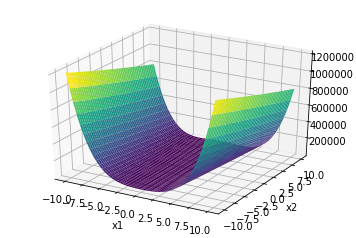

In [28]:
f_ex826.plot()

In [31]:
x_0 = sy.Matrix([-2, 2])
steepest_descent(f_ex826, x_0, verbose=False)

⎡1.69652635913806⎤
⎢                ⎥
⎣2.87711421760573⎦